# Udacity Data Analyst Nanodegree
## P2: Investigate a Dataset
#### Author: David Venturi
#### Date: May 2, 2016

## Background Information

**What is a balk?** [Pro Baseball Insider](http://probaseballinsider.com/baseball-instruction/what-is-a-balk/) has the simplest definition:
> In the simplest sense, a balk is when the pitcher tries to intentionally deceive the hitter or runner.  It can be a flinch on the mound after the pitcher gets set, a deceptive pick off attempt, or even just as simple as dropping the ball once you become set.  There are many actions that can result in a balk.  When runners are on base and a balk is called, all the runners move up one base.

A full list of the actions that consitute a balk can be found [here](https://en.wikipedia.org/wiki/Balk#Balk_actions).

**Balks are rare.** Since 2000, there have only been 100-200 balks per season, which is roughly one every 12 to 24 games (or 648 to 1296 innings pitched) in a full 2430-game season.

**Balks are difficult to spot.** They sometimes go unnoticed. What consitutes a balk might be subjective depending on the umpire. They might even be ignored by umpires depending on the situation.

**The definition of a balk has changed over time.** Throughout baseball history, there have been a number of tweaks to the balk rule. With each tweak, balk totals for the subsequent season tended to spike or dip.

## Questions for Investigation

How

## Dataset

The 2015 version of The Lahman Baseball Database contains complete batting and pitching statistics from 1871 to 2014, plus fielding statistics, standings, team stats, managerial records, post-season data, and more. The *Master* (player names, DOB, and biographical info), *Pitching* (pitching statistics), and *PitchingPost* (post-season pitching statistics) tables are required for this balk analysis.

The [full database](http://www.seanlahman.com/baseball-archive/statistics/) and a [detailed description](http://seanlahman.com/files/database/readme2014.txt) of its contents can be found on Sean Lahman's website.

In [57]:
import pandas as pd

master_df = pd.read_csv('../p2/baseballdatabank-master/core/Master.csv')
pitching_df = pd.read_csv('../p2/baseballdatabank-master/core/Pitching.csv')
pitchingpost_df = pd.read_csv('../p2/baseballdatabank-master/core/PitchingPost.csv')
batting_df = pd.read_csv('../p2/baseballdatabank-master/core/Batting.csv')

Populating the interactive namespace from numpy and matplotlib


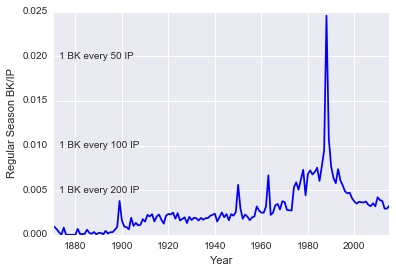

In [58]:
balks_by_year = pitching_df.groupby('yearID')['BK'].sum()
ip_by_year = (pitching_df.groupby('yearID')['IPouts'].sum()) / 3 # Convert to IP
balks_ip_by_year = balks_by_year / ip_by_year

%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

fig = balks_ip_by_year.plot(color='b')
fig.annotate('1 BK every 50 IP', xy=(1873, .02), xytext=(1873, .0197))
fig.annotate('1 BK every 100 IP', xy=(1873, .01), xytext=(1873, .0097))
fig.annotate('1 BK every 200 IP', xy=(1873, .005), xytext=(1873, .0047))
ylabel('Regular Season BK/IP')
xlabel('Year')

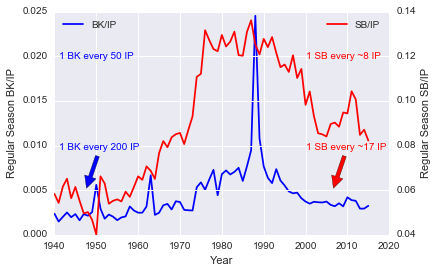

In [66]:
sb_by_year = batting_df.groupby('yearID')['SB'].sum()
cs_by_year = batting_df.groupby('yearID')['CS'].sum()
sb_attempts_by_year = sb_by_year + cs_by_year
sb_attempts_ip_by_year = sb_attempts_by_year / ip_by_year

x = balks_ip_by_year.loc['1940':'2015'].index.get_level_values('yearID')
y1 = balks_ip_by_year.loc['1940':'2015'].values
y2 = sb_attempts_ip_by_year.loc['1940':'2015'].values

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, color='b', label='BK/IP')
ax2.plot(x, y2, color='r', label='SB/IP')

ax1.legend(loc='upper left', shadow=True)
ax2.legend(loc='upper right', shadow=True)
ax1.set_xlabel('Year')
ax1.set_ylabel('Regular Season BK/IP')
ax2.set_ylabel('Regular Season SB/IP')
ax2.annotate('1 BK every 50 IP', xy=(1941, .12), xytext=(1941, .1188), color='blue')
ax2.annotate('1 BK every 200 IP', xy=(1947.5, .06), xytext=(1941, .078), color='blue',
             arrowprops=dict(facecolor='blue', shrink=0.05))
ax2.annotate('1 SB every ~8 IP', xy=(2000, .12), xytext=(2000, .1188), color='red')
ax2.annotate('1 SB every ~17 IP', xy=(2006.5, .06), xytext=(2000, .078), color='red',
             arrowprops=dict(facecolor='red', shrink=0.05))

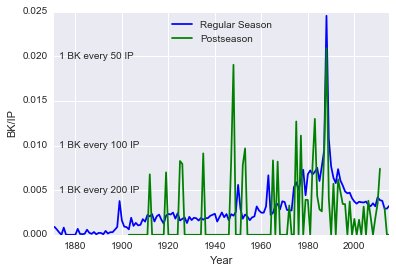

In [60]:
playoff_balks_by_year = pitchingpost_df.groupby('yearID')['BK'].sum()
playoff_ip_by_year = (pitchingpost_df.groupby('yearID')['IPouts'].sum()) / 3 # Convert to IP
playoff_balks_ip_by_year = playoff_balks_by_year / playoff_ip_by_year

fig = balks_ip_by_year.plot(color='b', label='Regular Season')
fig = playoff_balks_ip_by_year.plot(color='g', label='Postseason')
fig.legend(loc='upper center', shadow=True)
ylabel('BK/IP')
xlabel('Year')
fig.annotate('1 BK every 50 IP', xy=(1873, .02), xytext=(1873, .0197))
fig.annotate('1 BK every 100 IP', xy=(1873, .01), xytext=(1873, .0097))
fig.annotate('1 BK every 200 IP', xy=(1873, .005), xytext=(1873, .0047))

In [73]:
# REGULAR SEASON
season_balks = pitching_df['BK']
season_ip = pitching_df['IPouts'] / 3 # Convert to IP
season_balks_ip = season_balks / season_ip
season_ip_sum = season_ip.sum()

season_ip_weights = season_ip / season_ip_sum
season_weight_times_obs = season_ip_weights * season_balks_ip
weighted_season_mean = season_weight_times_obs.sum() / season_ip_weights.sum()
print "Weighted Season mean: " + str(weighted_season_mean)

# http://stats.stackexchange.com/questions/6534/how-do-i-calculate-a-weighted-standard-deviation-in-excel
# Very large sample size (>3 million), so don't need to re-scale the variance before sqrt
sum_season_weighted_squared_dev = (season_ip_weights * ((season_balks_ip - weighted_season_mean) ** 2)).sum()
weighted_season_std  = (sum_season_weighted_squared_dev / sum_season_ip_weights) ** 0.5
print "Weighted Season std: " + str(weighted_season_std)

season_n = season_ip_sum
print "Season n: " + str(season_n)

# POSTSEASON
playoff_balks = pitchingpost_df['BK']
playoff_ip = pitchingpost_df['IPouts'] / 3 # Convert to IP
playoff_balks_ip = playoff_balks / playoff_ip
playoff_ip_sum = playoff_ip.sum()

playoff_ip_weights = playoff_ip / playoff_ip_sum
playoff_weight_times_obs = playoff_ip_weights * playoff_balks_ip
weighted_playoff_mean = playoff_weight_times_obs.sum() / playoff_ip_weights.sum()
print "Weighted playoff mean: " + str(weighted_playoff_mean)

# http://stats.stackexchange.com/questions/6534/how-do-i-calculate-a-weighted-standard-deviation-in-excel
# Very large sample size (>27 thousand), so don't need to re-scale the variance before sqrt
sum_playoff_weighted_squared_dev = (playoff_ip_weights * ((playoff_balks_ip - weighted_playoff_mean) ** 2)).sum()
weighted_playoff_std  = (sum_playoff_weighted_squared_dev / sum_playoff_ip_weights) ** 0.5
print "Weighted playoff std: " + str(weighted_playoff_std)

playoff_n = playoff_ip_sum
print "Playoff n: " + str(playoff_n)

unpooled_se = (((weighted_season_std ** 2) / season_n) + ((weighted_playoff_std ** 2) / playoff_n)) ** (0.5)
print "Unpooled SE: " + str(unpooled_se)

t = (weighted_season_mean - weighted_playoff_mean) / unpooled_se
print "t: " + str(t)

num_df = (((weighted_season_std ** 2) / season_n) + ((weighted_playoff_std ** 2) / playoff_n)) ** 2
denom_df = ((1 / (season_n - 1.)) * (((weighted_season_std ** 2) / season_n) ** 2)) + \
            ((1 / (playoff_n - 1.)) * (((weighted_playoff_std ** 2) / playoff_n) ** 2))
df = num_df / denom_df
print "df: " + str(df) # confirmed here http://web.utk.edu/~cwiek/TwoSampleDoF

p = 0 # P(T > 6.82) using https://surfstat.anu.edu.au/surfstat-home/tables/t.php

Weighted Season mean: 0.00356572754435
Weighted Season std: 0.00945781564073
Season n: 3761644.66667
Weighted playoff mean: 0.00239982546724
Weighted playoff std: 0.0283436800814
Playoff n: 27502.0
Unpooled SE: 0.000170982159237
t: 6.81885222596
df: 27545.7929479


Null hypothesis: μ sub (regular season balks/ip - playoff balks/ip) <= 0

Alt hypothesis: μ sub (regular season balks/ip - playoff balks/ip) > 0

Process for t-test here: https://onlinecourses.science.psu.edu/stat200/node/60

In [74]:
balks_by_pitcher = pitching_df.groupby('playerID')['BK'].sum()
ip_by_pitcher = (pitching_df.groupby('playerID')['IPouts'].sum()) / 3 # Convert to IP
ip_balks_by_pitcher = ip_by_pitcher / balks_by_pitcher

# balks_by_pitcher.sort_values(ascending=False, inplace=True)

ip_by_pitcher.rename('IP', inplace=True)
ip_balks_by_pitcher.rename('IP/BK', inplace=True)

player_name_id = master_df[['playerID', 'nameFirst', 'nameLast', 'debut', 'finalGame']]

alltime_balk_king = player_name_id.join(ip_by_pitcher, on='playerID', how='inner')
alltime_balk_king = alltime_balk_king.join(balks_by_pitcher, on='playerID', how='inner')
alltime_balk_king = alltime_balk_king.join(ip_balks_by_pitcher, on='playerID', how='inner').sort_values('IP/BK', ascending=True)
alltime_balk_king = alltime_balk_king.loc[alltime_balk_king['IP'] > 50]

modern_balk_king = alltime_balk_king.loc[alltime_balk_king['debut'] > '2000-01-01']

balk_iron_man = alltime_balk_king.loc[(alltime_balk_king['BK'] == 0) & (alltime_balk_king['debut'] > '1950-01-01')].sort_values('IP', ascending=False)

In [63]:
alltime_balk_king.head(10)

,playerID,nameFirst,nameLast,debut,finalGame,IP,BK,IP/BK
7298,heinkdo01,Don,Heinkel,1988-04-07,1989-05-18,62.666667,7,8.952381
14706,rowedo01,Don,Rowe,1963-04-09,1963-07-18,54.666667,5,10.933333
10492,manzara01,Ravelo,Manzanillo,1988-09-25,1995-05-09,63.000000,5,12.600000
7227,haywara01,Ray,Hayward,1986-09-20,1988-07-05,78.666667,5,15.733333
6317,gonzage01,German,Gonzalez,1988-08-05,1989-09-25,50.333333,3,16.777778
5519,fortuti01,Tim,Fortugno,1992-07-20,1995-07-26,110.333333,6,18.388889
8357,jimenge01,German,Jimenez,1988-06-28,1988-10-01,55.666667,3,18.555556
8911,kentst01,Steven,Kent,2002-04-04,2002-09-22,57.333333,3,19.111111
10783,mayayu01,Yunesky,Maya,2010-09-07,2013-05-21,59.000000,3,19.666667
17750,waltege01,Gene,Walter,1985-08-09,1988-09-30,182.666667,9,20.296296


In [64]:
modern_balk_king.head(10)

,playerID,nameFirst,nameLast,debut,finalGame,IP,BK,IP/BK
8911,kentst01,Steven,Kent,2002-04-04,2002-09-22,57.333333,3,19.111111
10783,mayayu01,Yunesky,Maya,2010-09-07,2013-05-21,59.000000,3,19.666667
14022,reedev01,Evan,Reed,2013-05-16,2014-09-19,55.666667,2,27.833333
152,albural01,Al,Alburquerque,2011-04-15,2015-09-29,225.000000,8,28.125000
11821,moralfr01,Franklin,Morales,2007-08-18,2015-10-04,486.000000,17,28.588235
12321,neugeni01,Nick,Neugebauer,2001-08-19,2002-09-25,61.333333,2,30.666667
2175,burgoam01,Ambiorix,Burgos,2005-04-23,2007-05-26,160.333333,5,32.066667
368,andrima01,Matt,Andriese,2015-04-10,2015-10-04,65.666667,2,32.833333
4983,escaled01,Edgmer,Escalona,2010-09-10,2013-08-18,100.000000,3,33.333333
13362,phelptr01,Travis,Phelps,2001-04-19,2004-09-11,105.666667,3,35.222222


In [65]:
balk_iron_man.head(10)

,playerID,nameFirst,nameLast,debut,finalGame,IP,BK,IP/BK
14750,rueteki01,Kirk,Rueter,1993-07-07,2005-07-29,1918.000000,0,inf
8591,jonessa02,Sam,Jones,1951-09-22,1964-10-03,1643.333333,0,inf
11612,miltoer01,Eric,Milton,1998-04-05,2009-06-27,1582.333333,0,inf
9534,larsedo01,Don,Larsen,1953-04-18,1967-07-07,1548.000000,0,inf
1839,breweto01,Tom,Brewer,1954-04-18,1961-09-27,1509.333333,0,inf
6857,halldi01,Dick,Hall,1952-04-15,1971-09-25,1259.666667,0,inf
9863,lindbpa01,Paul,Lindblad,1965-09-15,1978-10-01,1213.666667,0,inf
1301,billich01,Chad,Billingsley,2006-06-15,2015-07-18,1212.333333,0,inf
10901,mccatst01,Steve,McCatty,1977-09-17,1985-09-25,1188.333333,0,inf
17161,travebi01,Bill,Travers,1974-05-19,1983-07-17,1120.666667,0,inf
